# DATA EXPLORATION FOR SPOTIFY DATA

In [1]:
#Importing all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading csv file for data exploration
df = pd.read_csv('spotify_data.csv')

In [3]:
#Printing top 5 values to get a hold of the data
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [4]:
#Looking for the shape
df.shape

(114000, 21)

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
#Printing all the unique values in track_genre column to begin analysis
unique_genres = df['track_genre'].unique()
print(unique_genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [7]:
#Printing unique genres with values
unique_genres_count = df['track_genre'].value_counts()
print(unique_genres_count)

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


In [8]:
#So here we could see we got a very big pool of genres, total 114 kind of unique genres are present
#each having 1000 values

#So best strategy is to get the most predominating genres of the batch we can help us in data analysis.
#I will try to get some visualisations before digging deep into it.

#Initial approach is to go for Random Forest Classifiers which can give a rough idea about the most important genres. 

In [9]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# #Creating two separate x and y values, keeping features as x and target as y
# features = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
#        'instrumentalness', 'liveness', 'valence', 'tempo',]]
# target = df['track_genre']

# #Splitting the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 50)

# #Creating a Random Forest Classifier
# clf = RandomForestClassifier(n_estimators = 100, random_state = 50)

# #Training the classifier
# clf.fit(x_train, y_train)

# #Making predictions in test set
# y_pred = clf.predict(x_test)

# #Evaluating accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

## So, random forest performed poorly, have to look for some other techniques

In [10]:
#Getting a look at all datatypes in order to get the most important ones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
#Getting all important nuerical columns, created a new sub df for storing those values
desired_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
num_df = pd.read_csv('spotify_data.csv', 
                     usecols = desired_columns)
print(num_df.head())

   danceability  energy  loudness  speechiness  acousticness  \
0         0.676  0.4610    -6.746       0.1430        0.0322   
1         0.420  0.1660   -17.235       0.0763        0.9240   
2         0.438  0.3590    -9.734       0.0557        0.2100   
3         0.266  0.0596   -18.515       0.0363        0.9050   
4         0.618  0.4430    -9.681       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  
0          0.000001    0.3580    0.715   87.917  
1          0.000006    0.1010    0.267   77.489  
2          0.000000    0.1170    0.120   76.332  
3          0.000071    0.1320    0.143  181.740  
4          0.000000    0.0829    0.167  119.949  


In [12]:
#Getting all values such as count and means for above created data frame
num_df.describe()

danceability         energy       loudness    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.566800       0.641383      -8.258960       0.084652   
std         0.173542       0.251529       5.029337       0.105732   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.456000       0.472000     -10.013000       0.035900   
50%         0.580000       0.685000      -7.004000       0.048900   
75%         0.695000       0.854000      -5.003000       0.084500   
max         0.985000       1.000000       4.532000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  
count  114000.000000  
mean      122.147837  
std        29.978197  
min         0.000000  
25%        99.218750  
50%       122.017000  
75%       140.071000  
max       243.372000

In [13]:
# We can analyse, except loudness and tempo, all other features lie between 0 and 1 while loudness values are mostly
# in negative and tempo value is usually very high ranging till 243.37


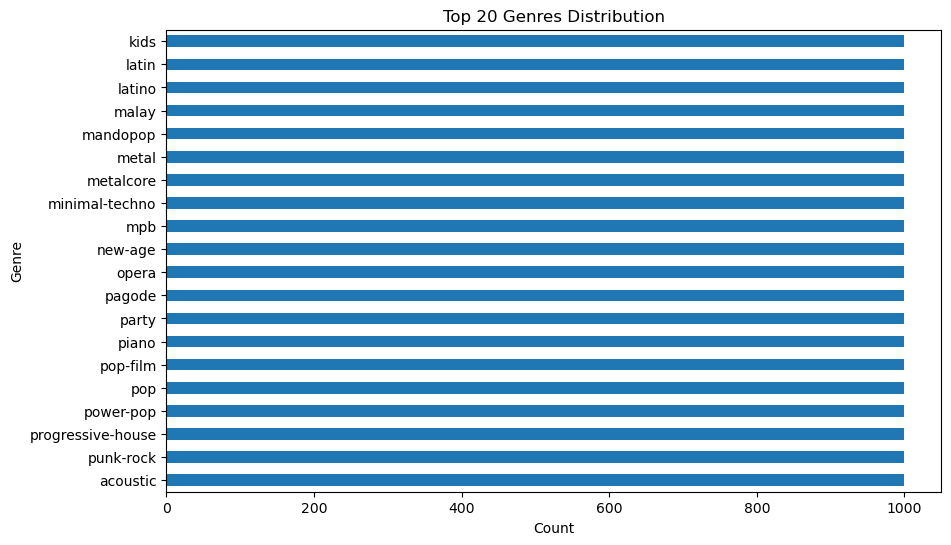

In [14]:
# Assuming 'genre' is the column containing genres in your DataFrame
genre_counts = df['track_genre'].value_counts()

# Plot the genre distribution
genre_counts.head(20).plot(kind='barh', figsize=(10, 6))
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 20 Genres Distribution')
plt.show()


In [15]:
# Now selecting the most common and most relevant genres out of the lot which are:
# blues, jazz, classical, rock, pop, hip-hop

# Starting analysis of each genre with all features:

In [16]:
# Creating a new dataframe where taking genres with all numerical values, 9 features as seen here
# Just an addidtion to the numerical_df already created

new_desired_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre']

gen_num_df = pd.read_csv('spotify_data.csv',
                          usecols = new_desired_cols)
print(gen_num_df.head())

   danceability  energy  loudness  speechiness  acousticness  \
0         0.676  0.4610    -6.746       0.1430        0.0322   
1         0.420  0.1660   -17.235       0.0763        0.9240   
2         0.438  0.3590    -9.734       0.0557        0.2100   
3         0.266  0.0596   -18.515       0.0363        0.9050   
4         0.618  0.4430    -9.681       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo track_genre  
0          0.000001    0.3580    0.715   87.917    acoustic  
1          0.000006    0.1010    0.267   77.489    acoustic  
2          0.000000    0.1170    0.120   76.332    acoustic  
3          0.000071    0.1320    0.143  181.740    acoustic  
4          0.000000    0.0829    0.167  119.949    acoustic  


In [17]:
# Checking the shape it gives us all values with reduced clutter in columns, but reducing clutter in terms of genres
# is remaining which i'll do in next steps

gen_num_df.shape

(114000, 10)

In [18]:
# First task is to group the needed genres and get their respective mathematical calculations
# This is important as here we are using isin function which provides parameter filtering, so here we get 
# all numerical values for 6 genres as desired


desired_genres = ['blues', 'jazz', 'metal', 'rock', 'pop', 'hip-hop']
gen_df = gen_num_df[gen_num_df['track_genre'].isin(desired_genres)]
print(gen_df.head())


      danceability  energy  loudness  speechiness  acousticness  \
8000         0.509   0.448    -7.552       0.0357       0.00713   
8001         0.636   0.676    -3.442       0.0263       0.08070   
8002         0.573   0.539    -6.091       0.0322       0.01620   
8003         0.743   0.446    -7.807       0.0683       0.00390   
8004         0.572   0.214   -15.625       0.0293       0.64900   

      instrumentalness  liveness  valence    tempo track_genre  
8000          0.013700    0.2440    0.221  156.909       blues  
8001          0.000000    0.0831    0.273  113.980       blues  
8002          0.000012    0.1050    0.390   75.012       blues  
8003          0.118000    0.3370    0.278  123.596       blues  
8004          0.129000    0.1250    0.485   95.542       blues  


In [19]:
gen_df.shape

(6000, 10)

In [36]:
# Now that we got each genre and it's respective values, it's time to start exploring, i'll take individual genre
# one-on-one with each parameter to check it's influence on music with respect to other patrameters.

In [20]:
# genre1 = 'blues'
# genre1_df = gen_df[gen_df['track_genre'] == genre1]

In [21]:
# # Looping through each feature and analyze it
# for feature in gen_df.columns[0: -1]: 
#     # Creating a histogram for each feature
#     plt.hist(genre1_df[feature], bins=20)
#     plt.title(f'Distribution of {feature} for {genre1}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.show()

In [39]:

"""
blues vs rest
jazz vs rest
classical vs rest
rock vs rest
pop vs rest
"""

"""
create a function compare() that will take a genre string (g) as input and display stats for g and (G - g),
where G is the set of shortlisted genres. For e.g., if I call compare(gen_df, 'blues') and I
calculate mean, median, and box-plots, I should get a 9 * 3 * 2 plots.

For each plot, I want to see 2 columns -> the left one will be the plot for the selected genre and the right one
will be the plot for all the remaining genres.

SAMPLE:

compare(gen_df, 'blues'):
    stats = ['mean', 'median', 'boxplot', ....]
    
    mean_blues_danceability          mean_others_danceability
    mean_blues_energy                mean_others_energy
    ....
    ....

"""

"\ncreate a function compare() that will take a genre string (g) as input and display stats for g and (G - g),\nwhere G is the set of shortlisted genres. For e.g., if I call compare(gen_df, 'blues') and I\ncalculate mean, median, and box-plots, I should get a 9 * 3 * 2 plots.\n\nFor each plot, I want to see 2 columns -> the left one will be the plot for the selected genre and the right one\nwill be the plot for all the remaining genres.\n\nSAMPLE:\n\ncompare(gen_df, 'blues'):\n    stats = ['mean', 'median', 'boxplot', ....]\n    \n    mean_blues_danceability          mean_others_danceability\n    mean_blues_energy                mean_others_energy\n    ....\n    ....\n\n"

In [22]:
# def compare(gen_df, selected_genre):
#     # Extract the list of other genres
#     other_genres = gen_df['track_genre'].unique()
#     other_genres = other_genres[other_genres != selected_genre]

#     # List of statistics to calculate
#     statistics = ['mean', 'median', 'boxplot']  # Add more as needed

#     for stat in statistics:
        
        
#         # Create a figure with subplots
#         fig, axes = plt.subplots(nrows=len(gen_df.columns[0:-1]), ncols=2, figsize=(15, 5 * len(gen_df.columns[0:-1])))
#         fig.suptitle(f'{stat.capitalize()} Comparison for Genre: {selected_genre}', y=1.02)

#         # Loop through each feature
#         for i, feature in enumerate(gen_df.columns[0:-1]):
#             # Plot for the selected genre
#             sns.set(style="whitegrid")
#             sns.set_palette("pastel")
#             sns.set_context("notebook", rc={"lines.linewidth": 2.5})
#             ax = sns.boxplot(x='track_genre', y=feature, data=gen_df[gen_df['track_genre'] == selected_genre], ax=axes[i, 0])
#             ax.set_title(f'{selected_genre} - {stat.capitalize()} - {feature}')

#             # Plot for all other genres
#             sns.set(style="whitegrid")
#             sns.set_palette("pastel")
#             sns.set_context("notebook", rc={"lines.linewidth": 2.5})
#             ax = sns.boxplot(x='track_genre', y=feature, data=gen_df[gen_df['track_genre'].isin(other_genres)], ax=axes[i, 1])
#             ax.set_title(f'Others - {stat.capitalize()} - {feature}')

#         # Adjust layout
#         plt.tight_layout()
#         plt.show()

# # Example usage
# compare(gen_df, 'jazz')


In [23]:
# def compare(gen_df, selected_genre):
    
#     # Excluding 'track_genre' from the comparison
#     features_to_compare = gen_df.columns[0:-1]  

#     # Extracting the list of other genres except selected genre
#     other_genres = gen_df['track_genre'].unique()
#     other_genres = other_genres[other_genres != selected_genre]

#     # Creating a figure with subplots
#     fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=3, figsize=(15, 5 * len(features_to_compare)))
#     fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

#     # Looping through each feature
#     for i, feature in enumerate(features_to_compare):
#         # Plot for the selected genre - Mean
#         sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
#         axes[i, 0].set_title(f'{selected_genre} - Histogram - {feature}')

#         # Plot for all other genres - Mean
#         sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
#         axes[i, 1].set_title(f'Others - Histogram - {feature}')

#         # Plot for selected genre and all other genres - Median
#         sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 2], hue='track_genre')
#         axes[i, 2].set_title(f'Comparison - Boxplot - {feature}')

    
#     plt.tight_layout()
#     plt.show()

# # Example usage
# compare(gen_df, 'blues')


In [24]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()


Mean_metal_danceability: 0.46428800000000003	Mean_Others_danceability: 0.5977492
Median_metal_danceability: 0.472	Median_Others_danceability: 0.602

Mean_metal_energy: 0.840273	Mean_Others_energy: 0.580574006
Median_metal_energy: 0.89	Median_Others_energy: 0.5965

Mean_metal_loudness: -5.425439	Mean_Others_loudness: -7.9402762000000005
Median_metal_loudness: -5.004	Median_Others_loudness: -7.227

Mean_metal_speechiness: 0.07026059999999999	Mean_Others_speechiness: 0.07583651999999999
Median_metal_speechiness: 0.054650000000000004	Median_Others_speechiness: 0.0462

Mean_metal_acousticness: 0.037084863339999996	Mean_Others_acousticness: 0.37220773727999995
Median_metal_acousticness: 0.003155	Median_Others_acousticness: 0.285

Mean_metal_instrumentalness: 0.06460309569	Mean_Others_instrumentalness: 0.030912844518
Median_metal_instrumentalness: 0.000205	Median_Others_instrumentalness: 1.64e-06

Mean_metal_liveness: 0.20515809999999998	Mean_Others_liveness: 0.17705366
Median_metal_liveness:

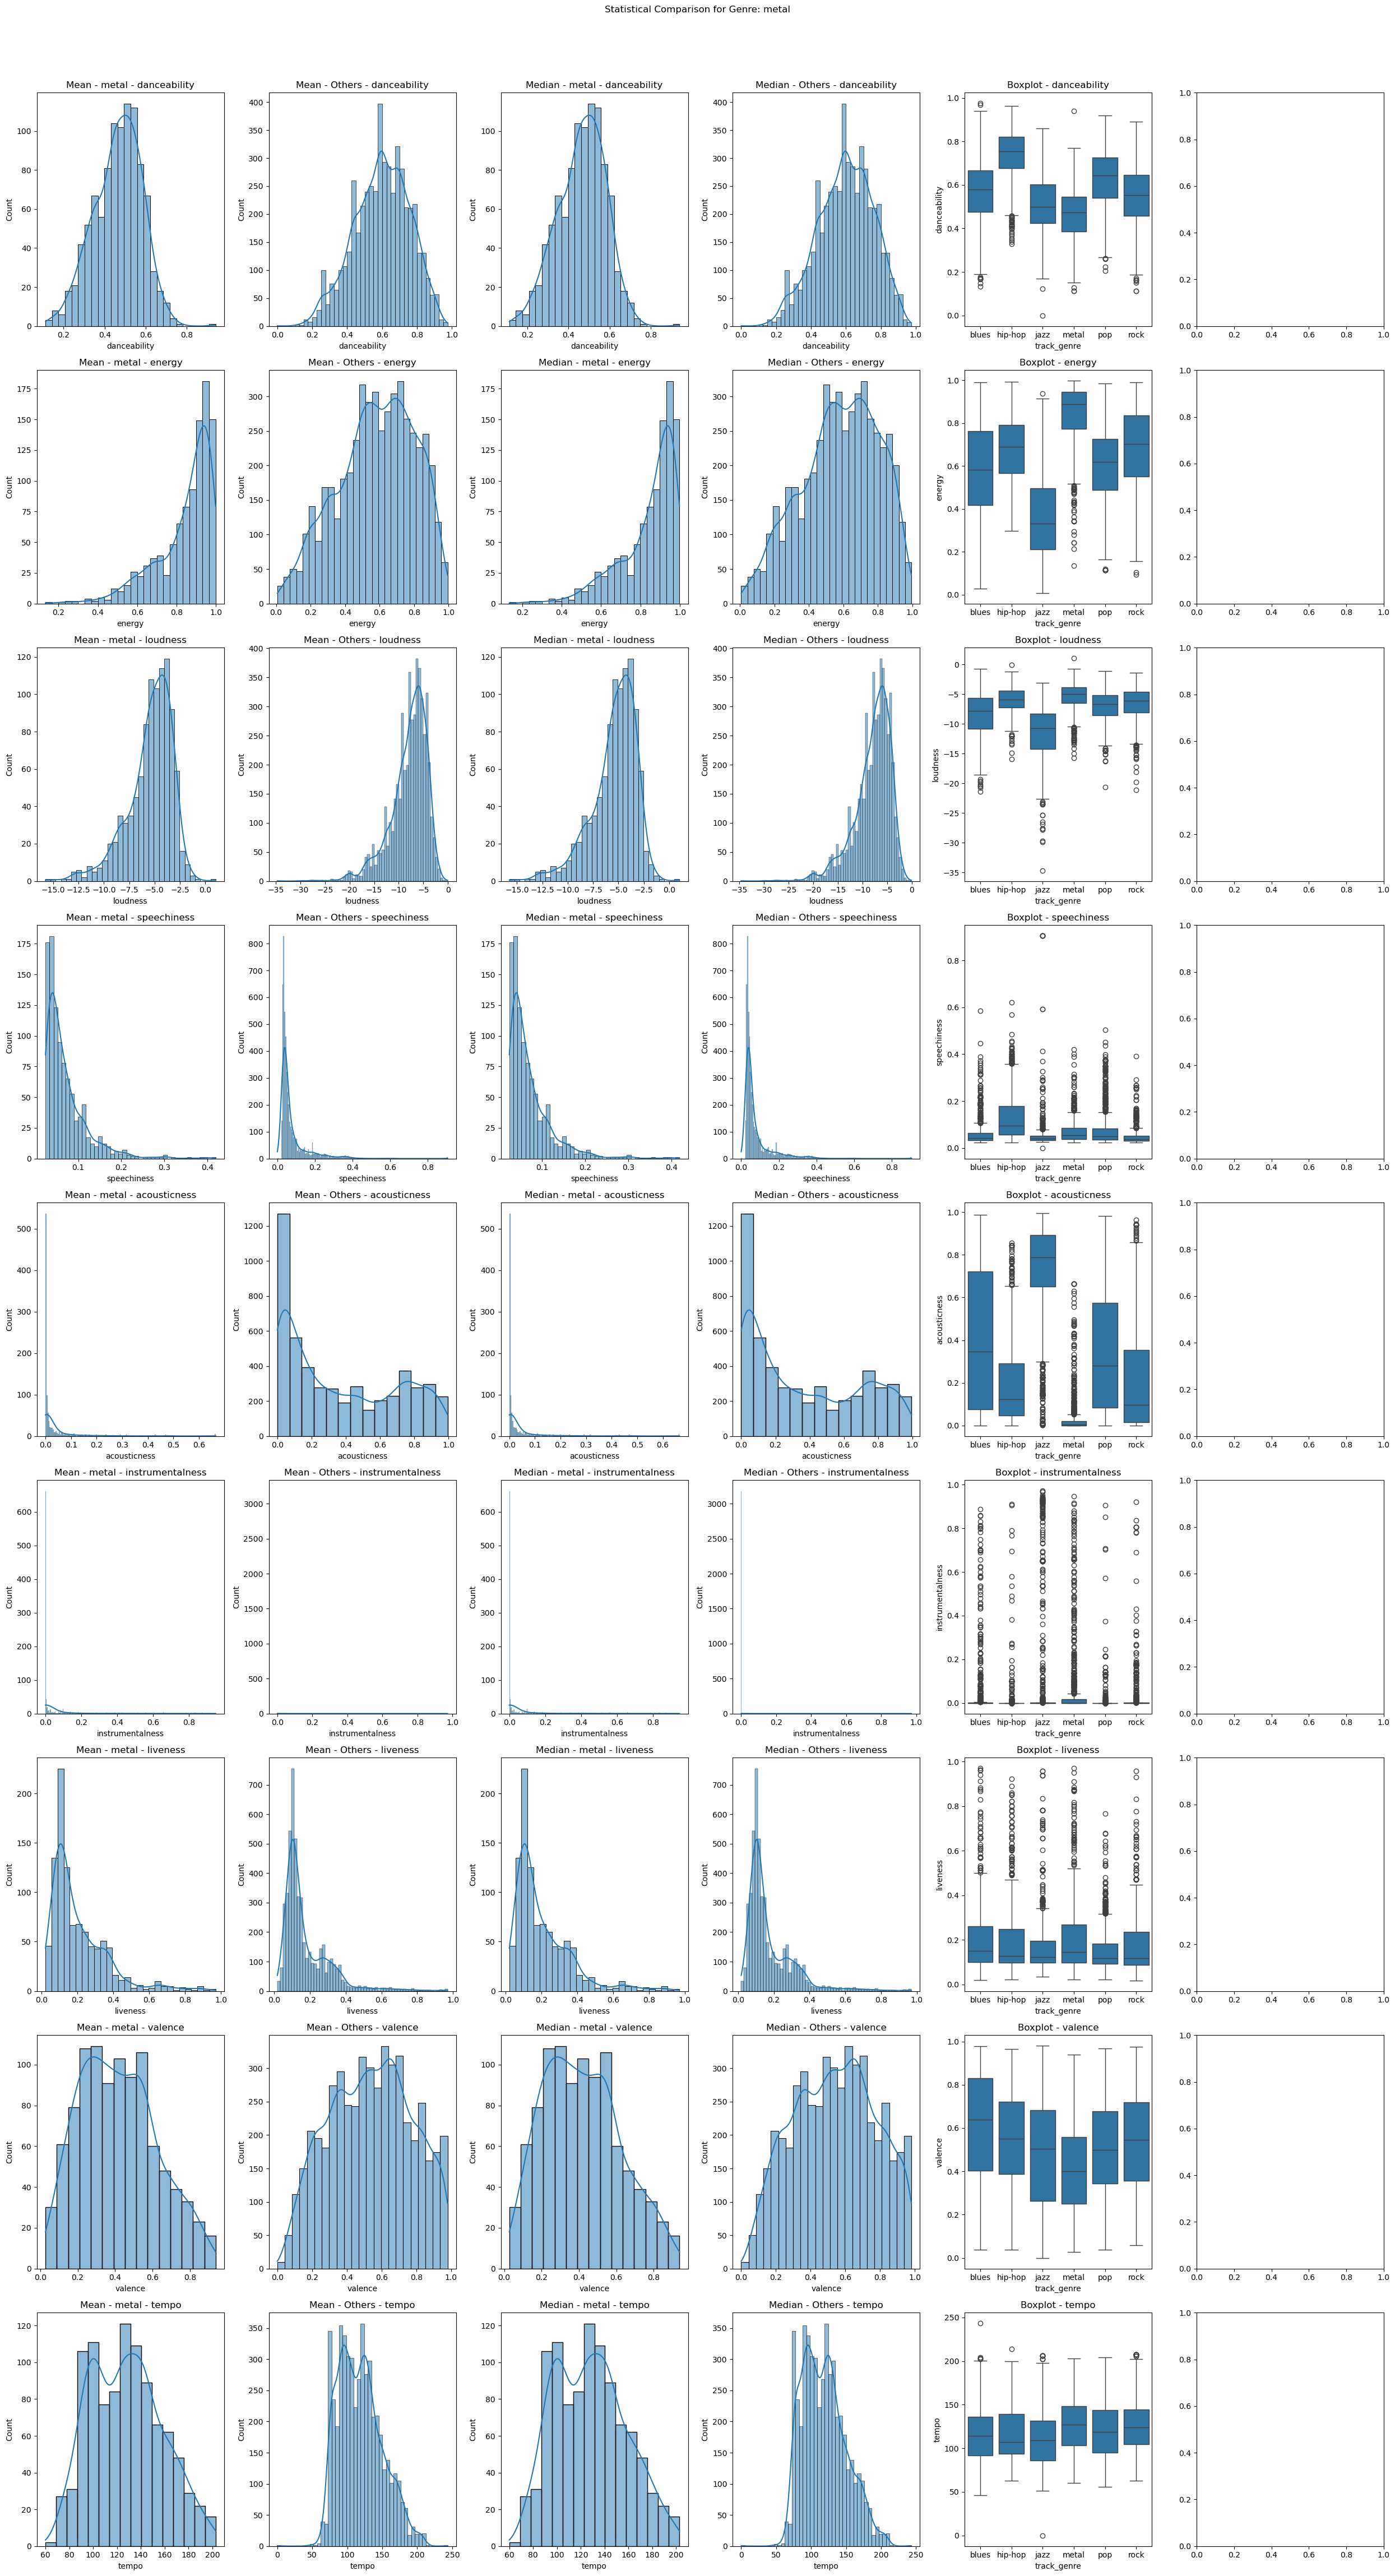

In [25]:
compare(gen_df, 'metal')

Mean_jazz_danceability: 0.5099750000000001	Mean_Others_danceability: 0.57213876
Median_jazz_danceability: 0.499	Median_Others_danceability: 0.592

Mean_jazz_energy: 0.35295443	Mean_Others_energy: 0.5479485852
Median_jazz_energy: 0.332	Median_Others_energy: 0.587

Mean_jazz_loudness: -11.578764999999999	Mean_Others_loudness: -9.6535664
Median_jazz_loudness: -10.6985	Median_Others_loudness: -7.397

Mean_jazz_speechiness: 0.055013	Mean_Others_speechiness: 0.07500004
Median_jazz_speechiness: 0.038900000000000004	Median_Others_speechiness: 0.0466

Mean_jazz_acousticness: 0.7158157070000001	Mean_Others_acousticness: 0.41305438557999996
Median_jazz_acousticness: 0.787	Median_Others_acousticness: 0.309

Mean_jazz_instrumentalness: 0.07956107896999999	Mean_Others_instrumentalness: 0.138842154256
Median_jazz_instrumentalness: 2.88e-06	Median_Others_instrumentalness: 1.255e-05

Mean_jazz_liveness: 0.1700251	Mean_Others_liveness: 0.17641616
Median_jazz_liveness: 0.123	Median_Others_liveness: 0.124

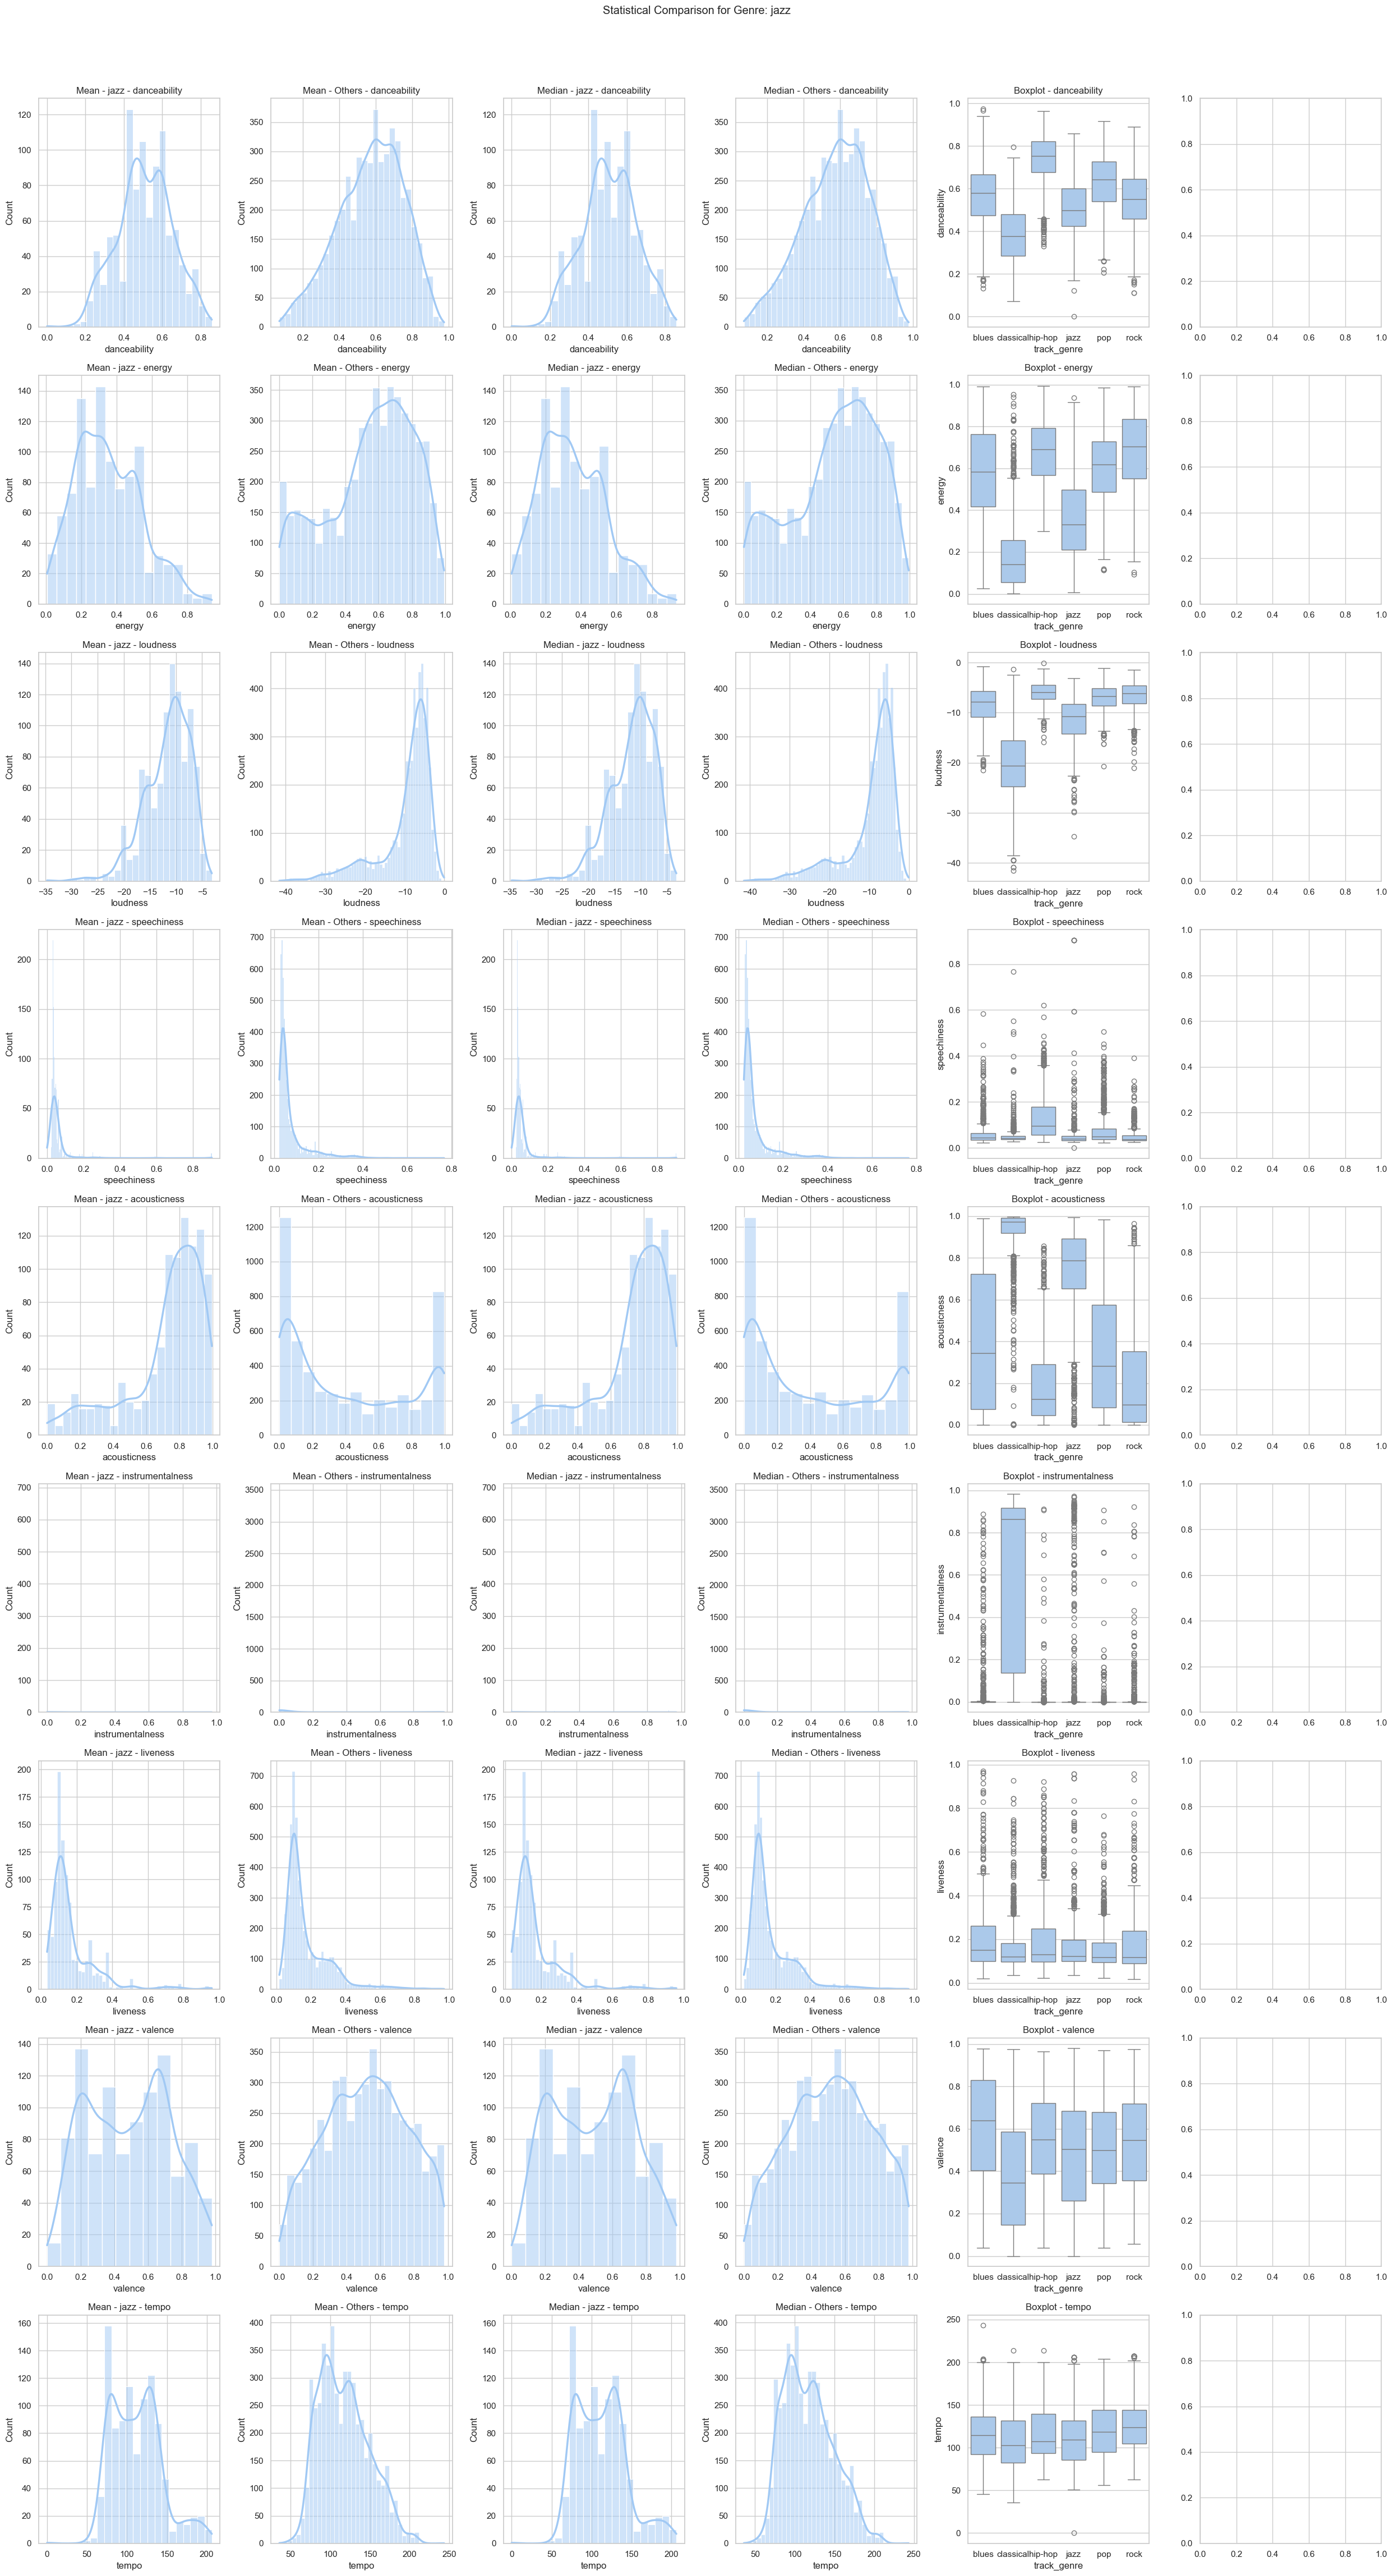

In [27]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()

compare(gen_df, 'jazz')


Mean_classical_danceability: 0.38192279999999995	Mean_Others_danceability: 0.5977492
Median_classical_danceability: 0.377	Median_Others_danceability: 0.602

Mean_classical_energy: 0.189827326	Mean_Others_energy: 0.580574006
Median_classical_energy: 0.142	Median_Others_energy: 0.5965

Mean_classical_loudness: -20.145216	Mean_Others_loudness: -7.9402762000000005
Median_classical_loudness: -20.5435	Median_Others_loudness: -7.227

Mean_classical_speechiness: 0.050830600000000004	Mean_Others_speechiness: 0.07583651999999999
Median_classical_speechiness: 0.0426	Median_Others_speechiness: 0.0462

Mean_classical_acousticness: 0.9200489485000001	Mean_Others_acousticness: 0.37220773727999995
Median_classical_acousticness: 0.973	Median_Others_acousticness: 0.285

Mean_classical_instrumentalness: 0.61920762766	Mean_Others_instrumentalness: 0.030912844518
Median_classical_instrumentalness: 0.8645	Median_Others_instrumentalness: 1.64e-06

Mean_classical_liveness: 0.1668376	Mean_Others_liveness: 0.17

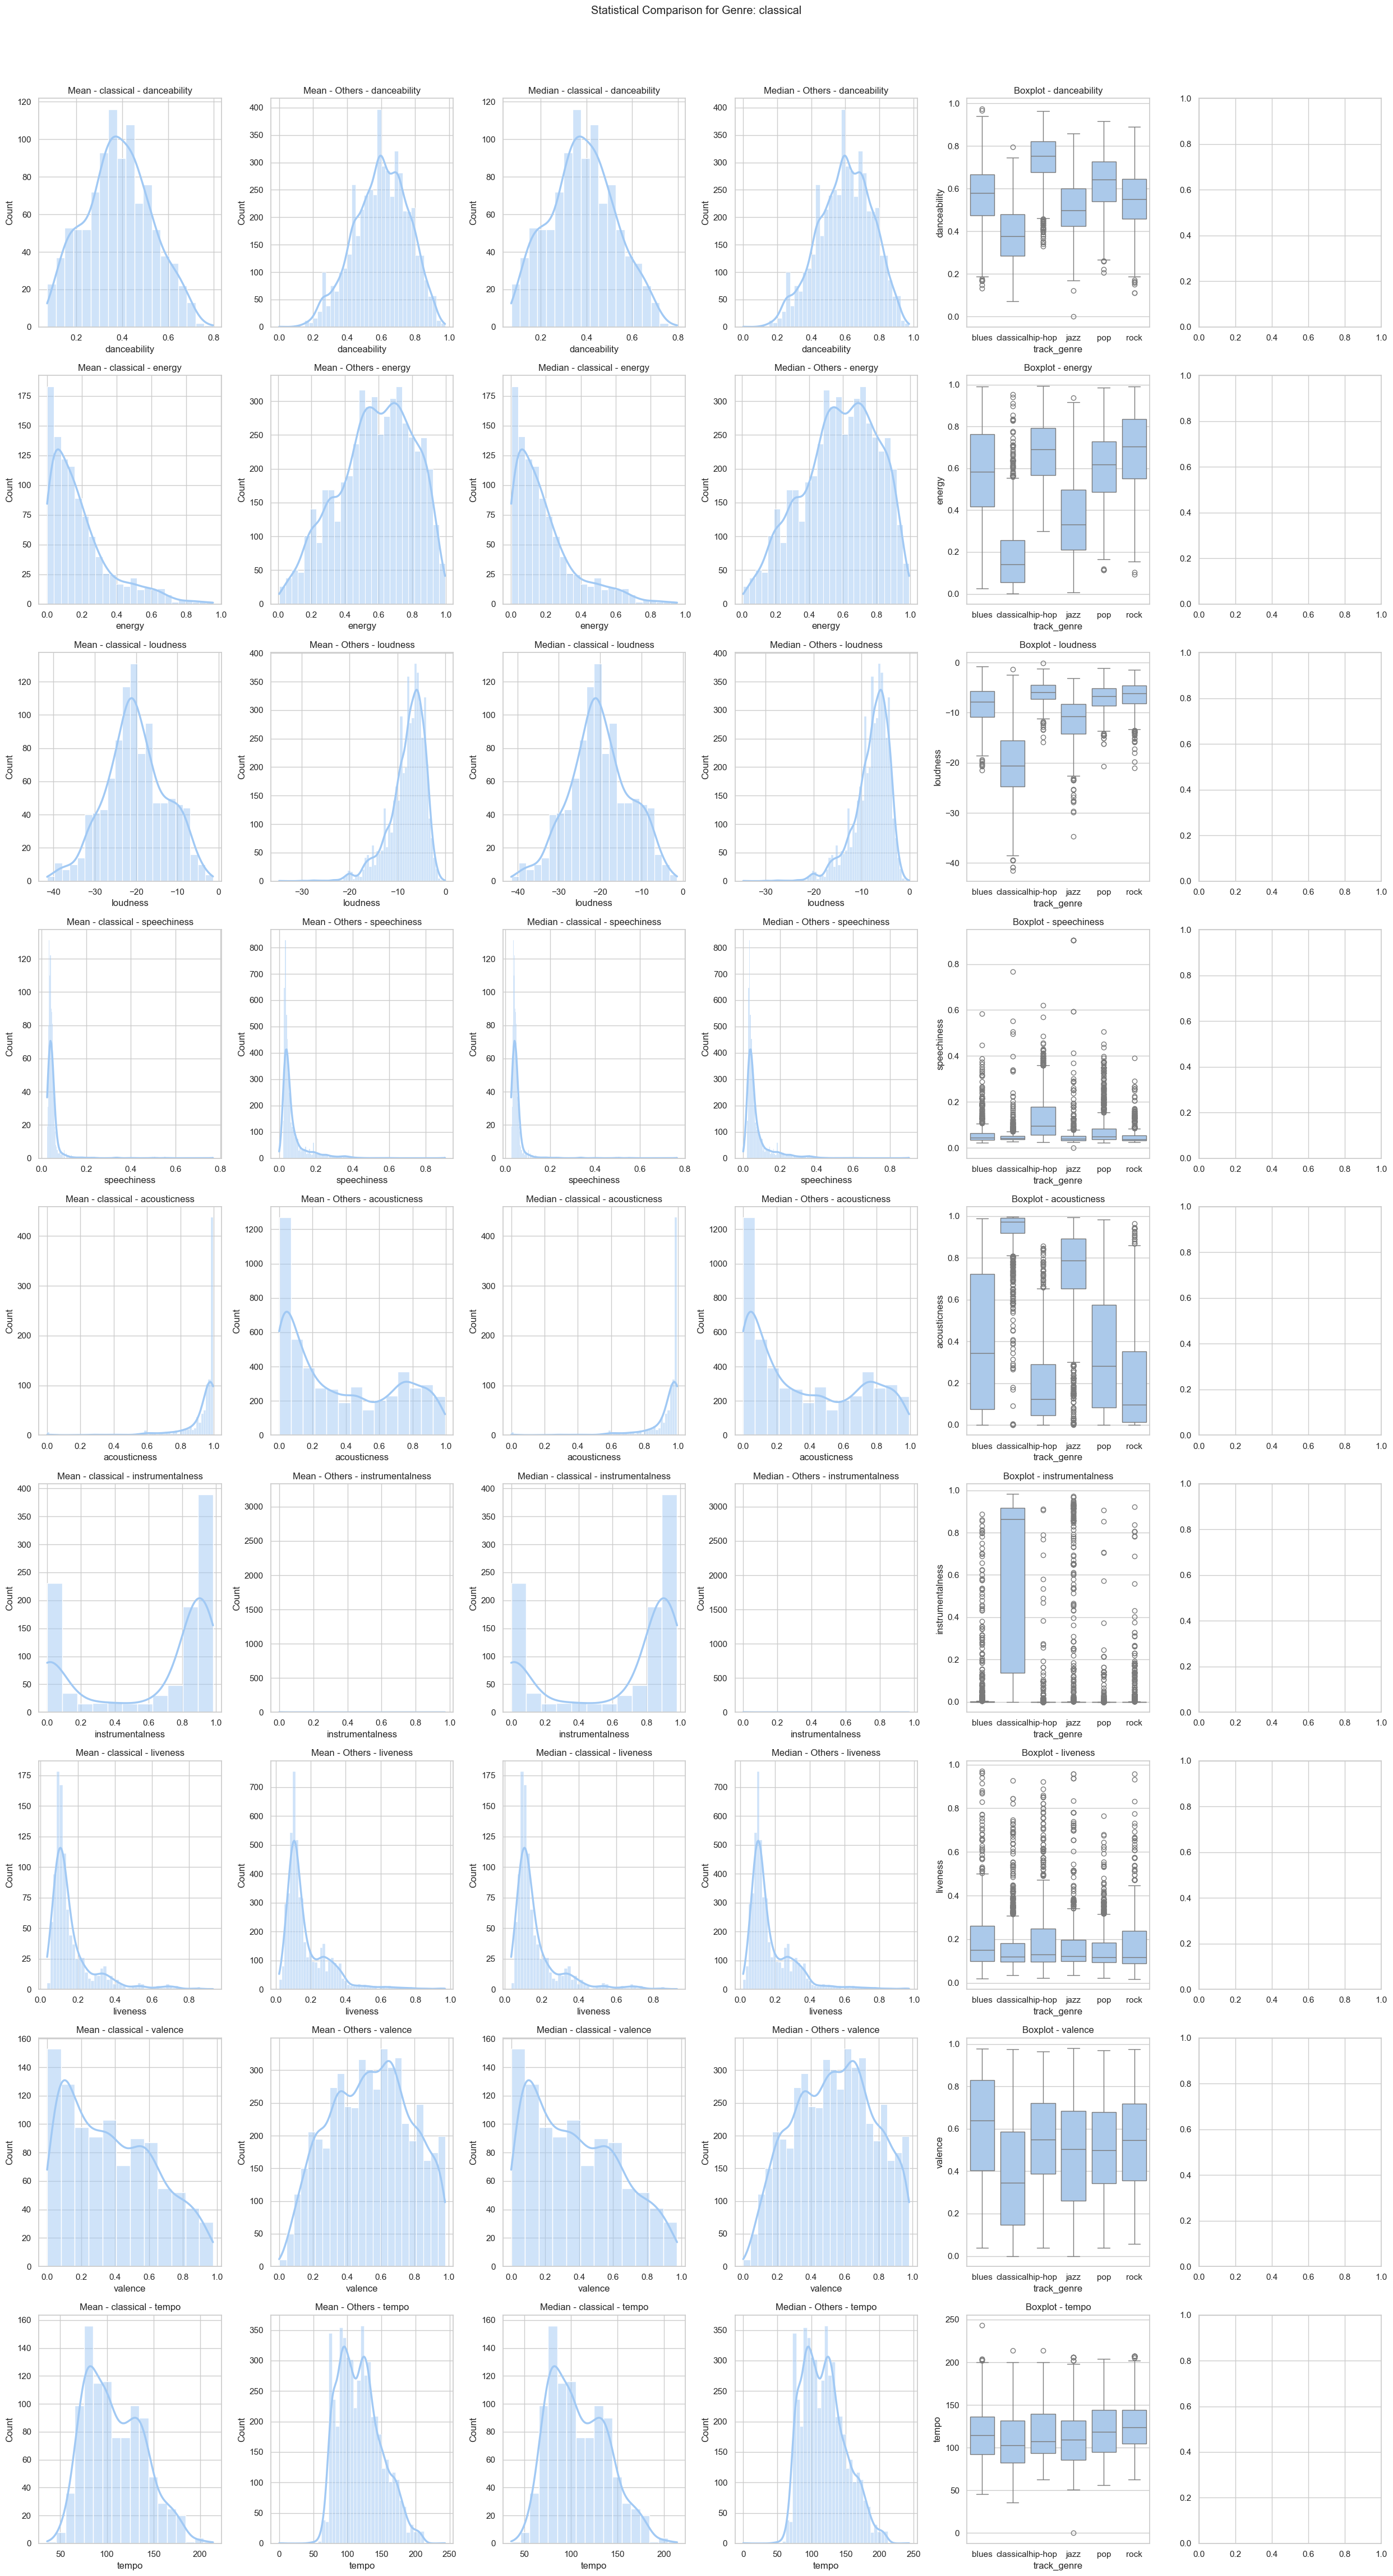

In [28]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()

compare(gen_df, 'classical')


Mean_rock_danceability: 0.5436089999999999	Mean_Others_danceability: 0.56541196
Median_rock_danceability: 0.552	Median_Others_danceability: 0.58

Mean_rock_energy: 0.6790711	Mean_Others_energy: 0.4827252512000001
Median_rock_energy: 0.703	Median_Others_energy: 0.502

Mean_rock_loudness: -6.664480999999999	Mean_Others_loudness: -10.636423200000001
Median_rock_loudness: -6.127	Median_Others_loudness: -8.435

Mean_rock_speechiness: 0.0499229	Mean_Others_speechiness: 0.07601805999999998
Median_rock_speechiness: 0.03785	Median_Others_speechiness: 0.0467

Mean_rock_acousticness: 0.2092416611	Mean_Others_acousticness: 0.51436919476
Median_rock_acousticness: 0.0956	Median_Others_acousticness: 0.5415000000000001

Mean_rock_instrumentalness: 0.02097829694	Mean_Others_instrumentalness: 0.150558710662
Median_rock_instrumentalness: 3.455e-06	Median_Others_instrumentalness: 1.14e-05

Mean_rock_liveness: 0.17251270000000002	Mean_Others_liveness: 0.17591864000000002
Median_rock_liveness: 0.117	Median_

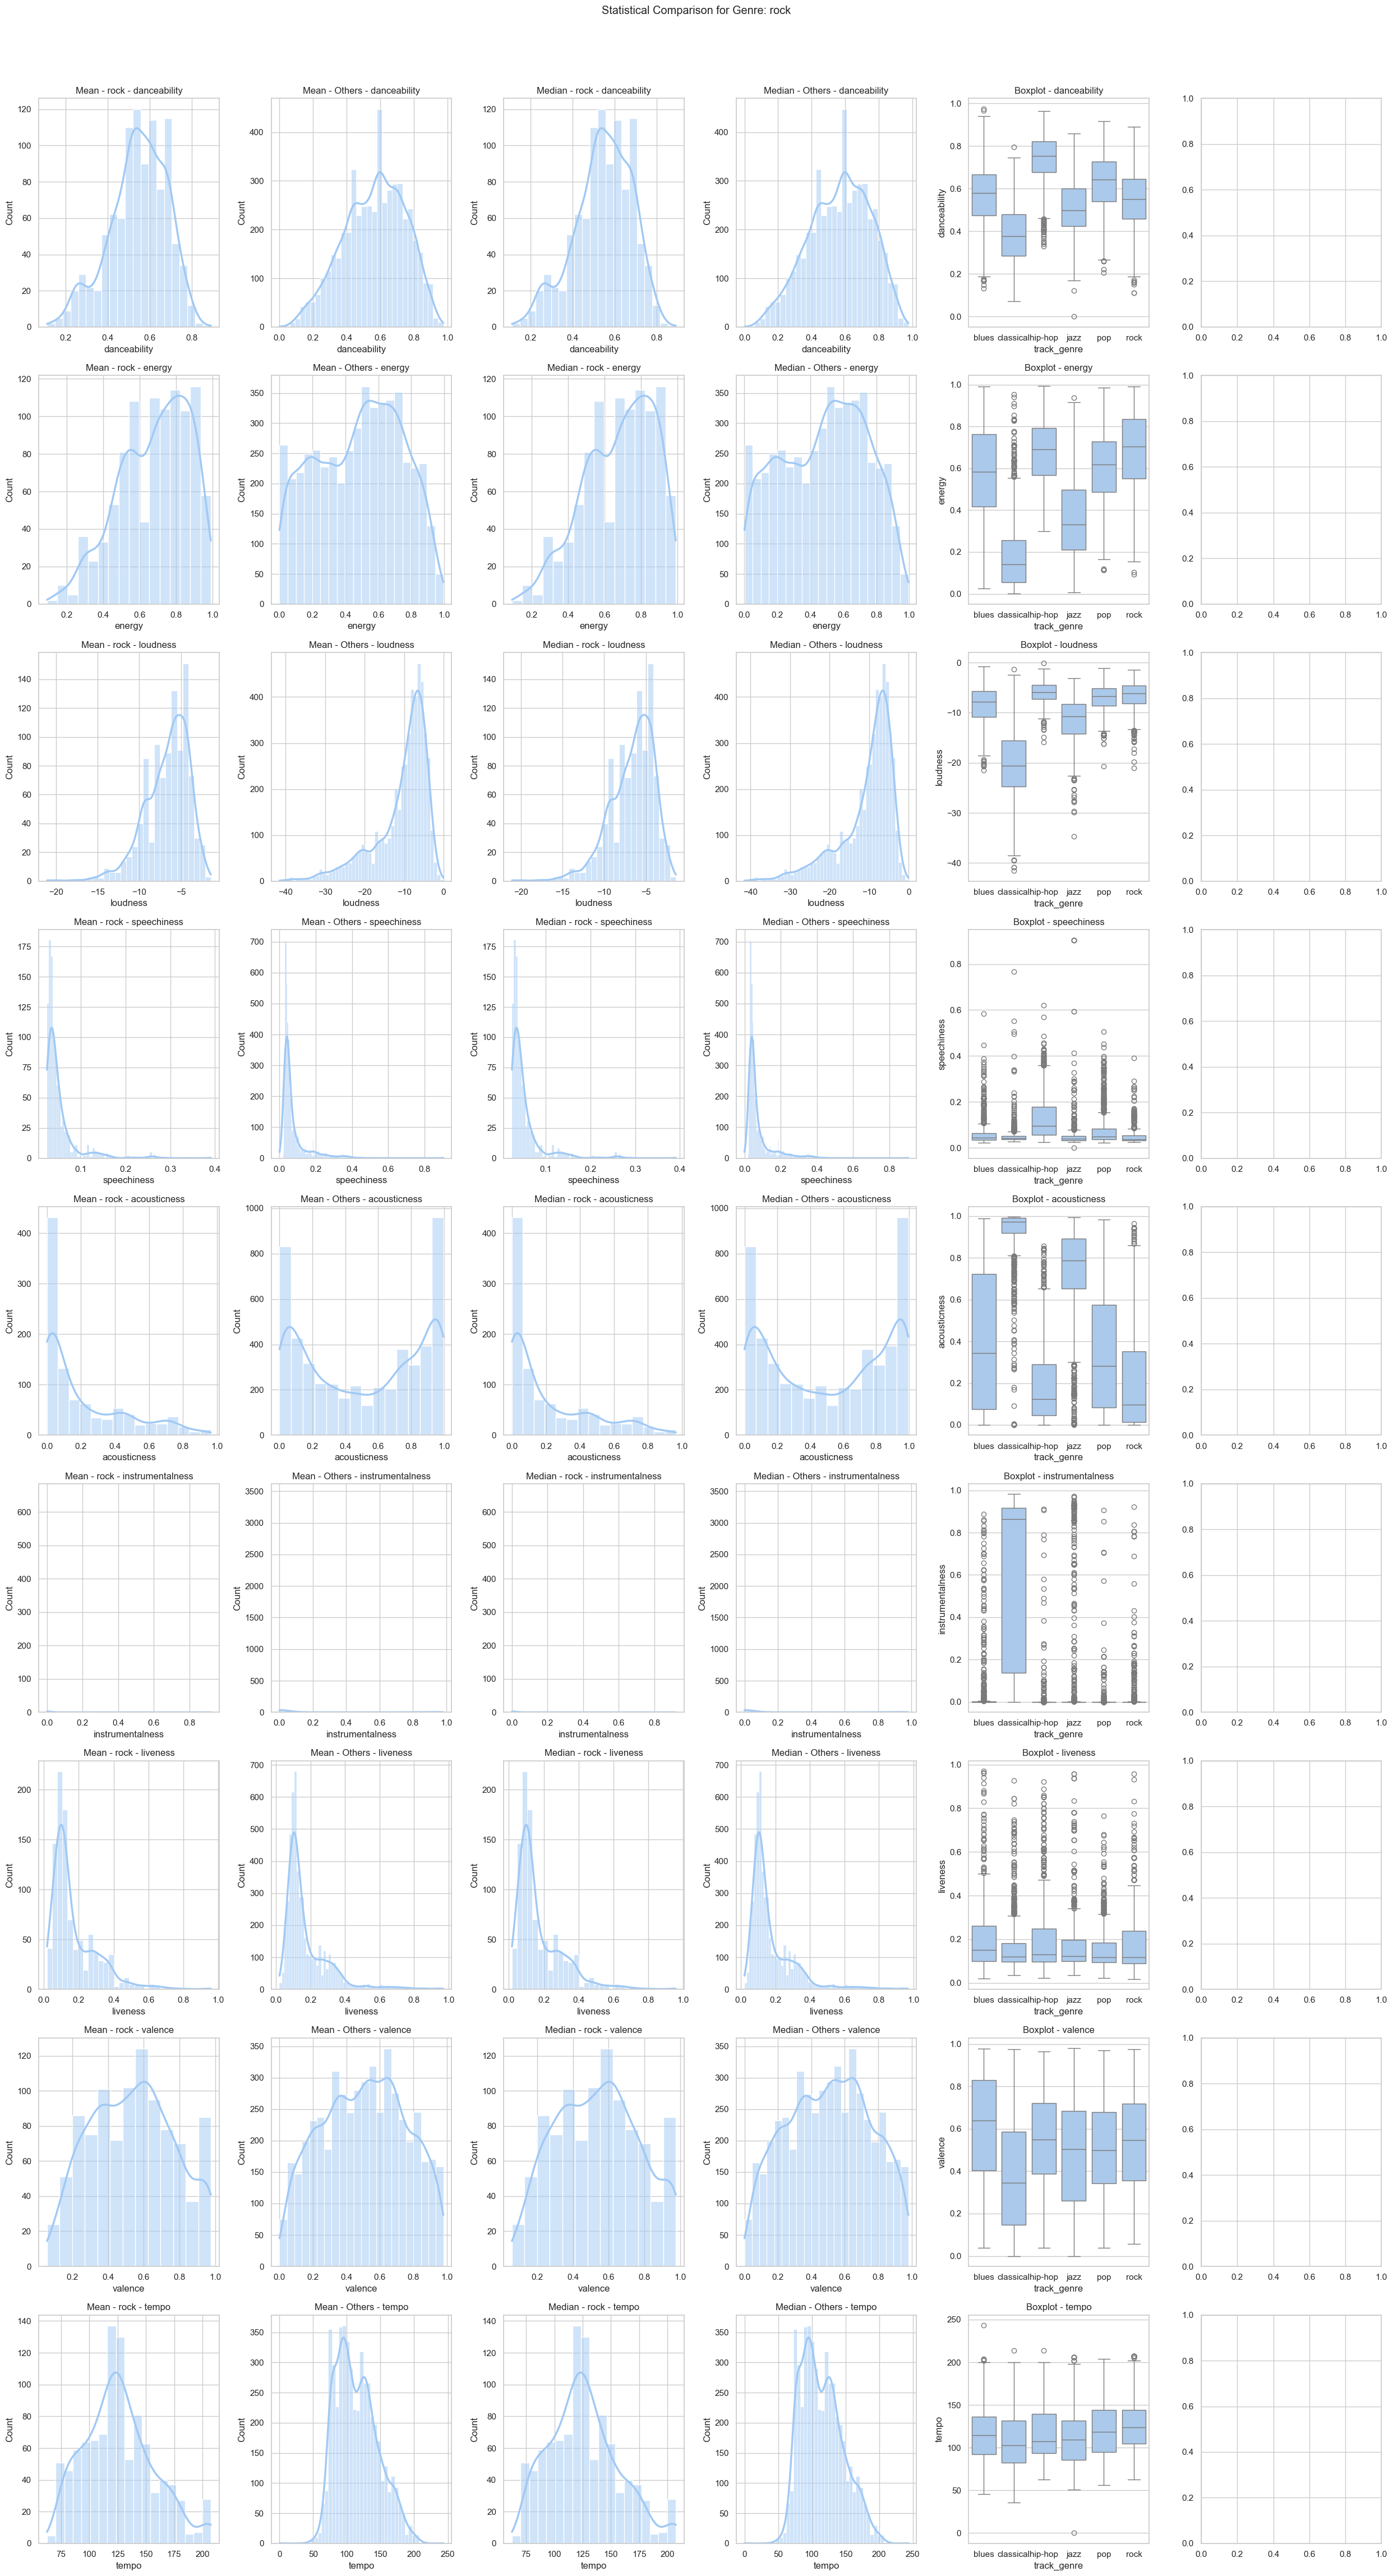

In [29]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()

compare(gen_df, 'rock')


Mean_pop_danceability: 0.630441	Mean_Others_danceability: 0.5480455599999999
Median_pop_danceability: 0.642	Median_Others_danceability: 0.556

Mean_pop_energy: 0.6064369999999999	Mean_Others_energy: 0.4972520712
Median_pop_energy: 0.618	Median_Others_energy: 0.514

Mean_pop_loudness: -6.953969	Mean_Others_loudness: -10.578525599999999
Median_pop_loudness: -6.7245	Median_Others_loudness: -8.315999999999999

Mean_pop_speechiness: 0.0799752	Mean_Others_speechiness: 0.0700076
Median_pop_speechiness: 0.0484	Median_Others_speechiness: 0.0446

Mean_pop_acousticness: 0.34369250999999995	Mean_Others_acousticness: 0.48747902498
Median_pop_acousticness: 0.281	Median_Others_acousticness: 0.472

Mean_pop_instrumentalness: 0.009026303910000002	Mean_Others_instrumentalness: 0.15294910926799998
Median_pop_instrumentalness: 0.0	Median_Others_instrumentalness: 2.4149999999999997e-05

Mean_pop_liveness: 0.15825579999999997	Mean_Others_liveness: 0.17877002
Median_pop_liveness: 0.1175	Median_Others_livenes

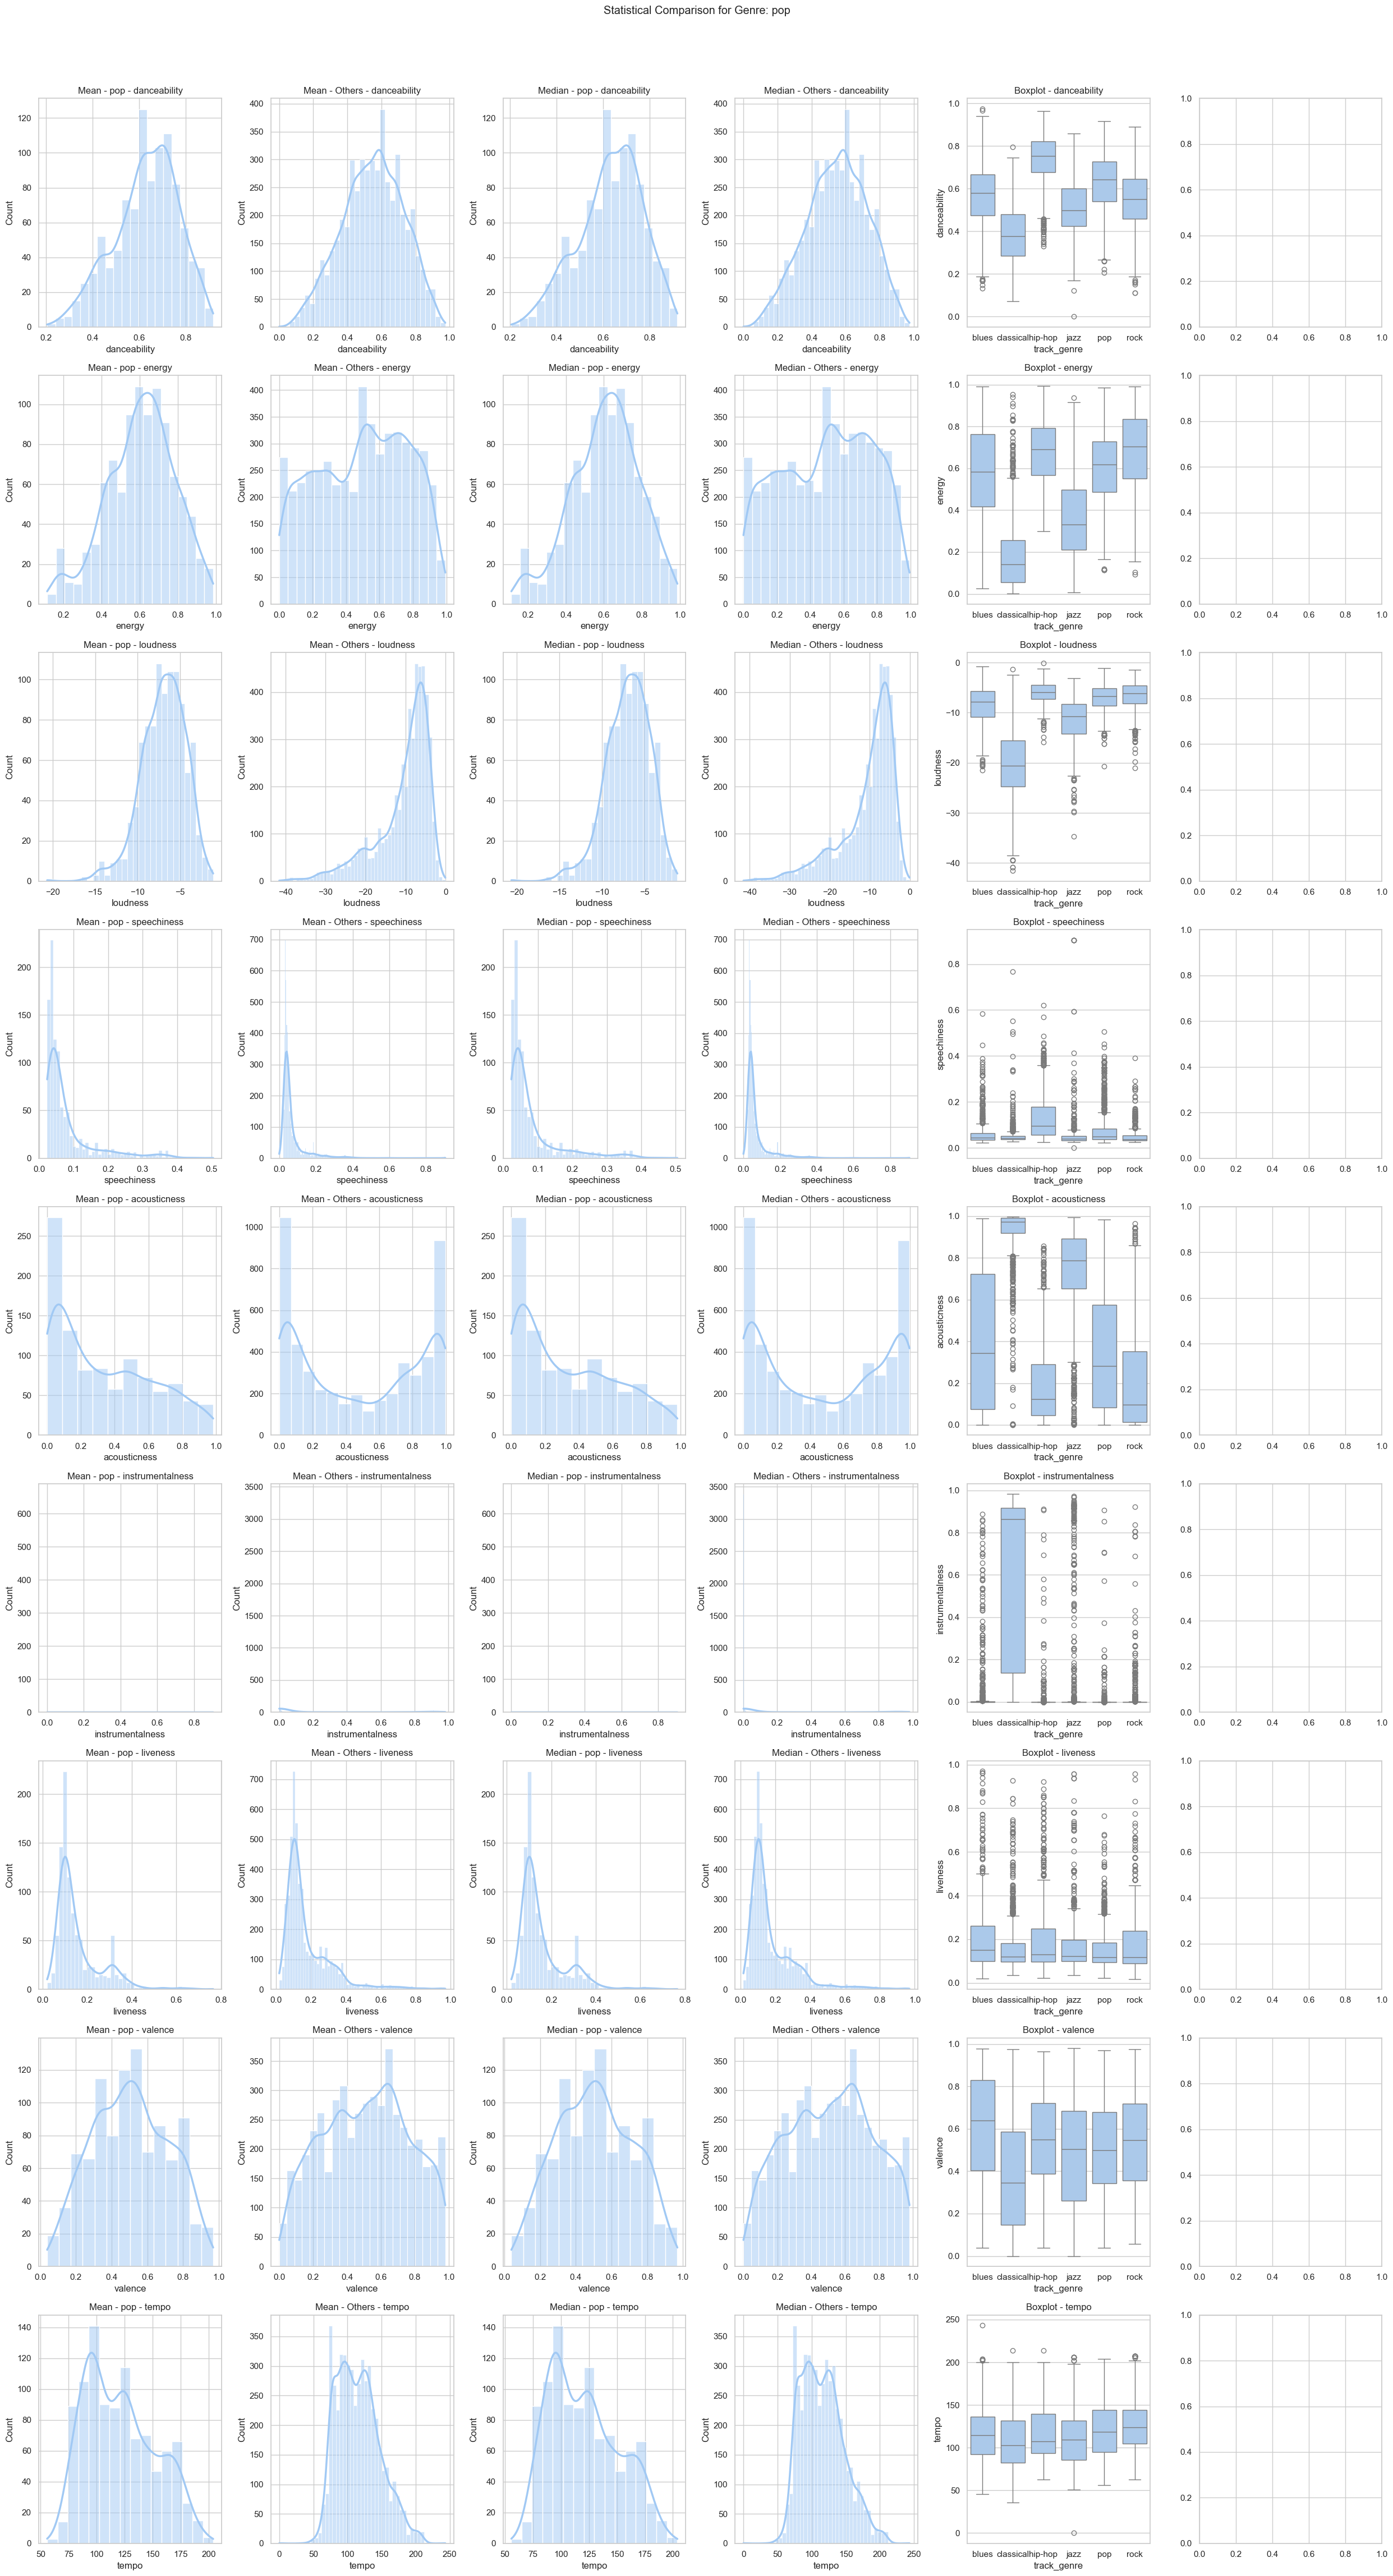

In [30]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()

compare(gen_df, 'pop')


Mean_hip hop_danceability: nan	Mean_Others_danceability: 0.5617781333333334
Median_hip hop_danceability: nan	Median_Others_danceability: 0.579

Mean_hip hop_energy: nan	Mean_Others_energy: 0.5154495593333334
Median_hip hop_energy: nan	Median_Others_energy: 0.543

Mean_hip hop_loudness: nan	Mean_Others_loudness: -9.974432833333333
Median_hip hop_loudness: nan	Median_Others_loudness: -7.862

Mean_hip hop_speechiness: nan	Mean_Others_speechiness: 0.07166886666666666
Median_hip hop_speechiness: nan	Median_Others_speechiness: 0.0451

Mean_hip hop_acousticness: nan	Mean_Others_acousticness: 0.46351460581666665
Median_hip hop_acousticness: nan	Median_Others_acousticness: 0.434

Mean_hip hop_instrumentalness: nan	Mean_Others_instrumentalness: 0.12896197504166668
Median_hip hop_instrumentalness: nan	Median_Others_instrumentalness: 9.76e-06

Mean_hip hop_liveness: nan	Mean_Others_liveness: 0.17535098333333335
Median_hip hop_liveness: nan	Median_Others_liveness: 0.124

Mean_hip hop_valence: nan	M

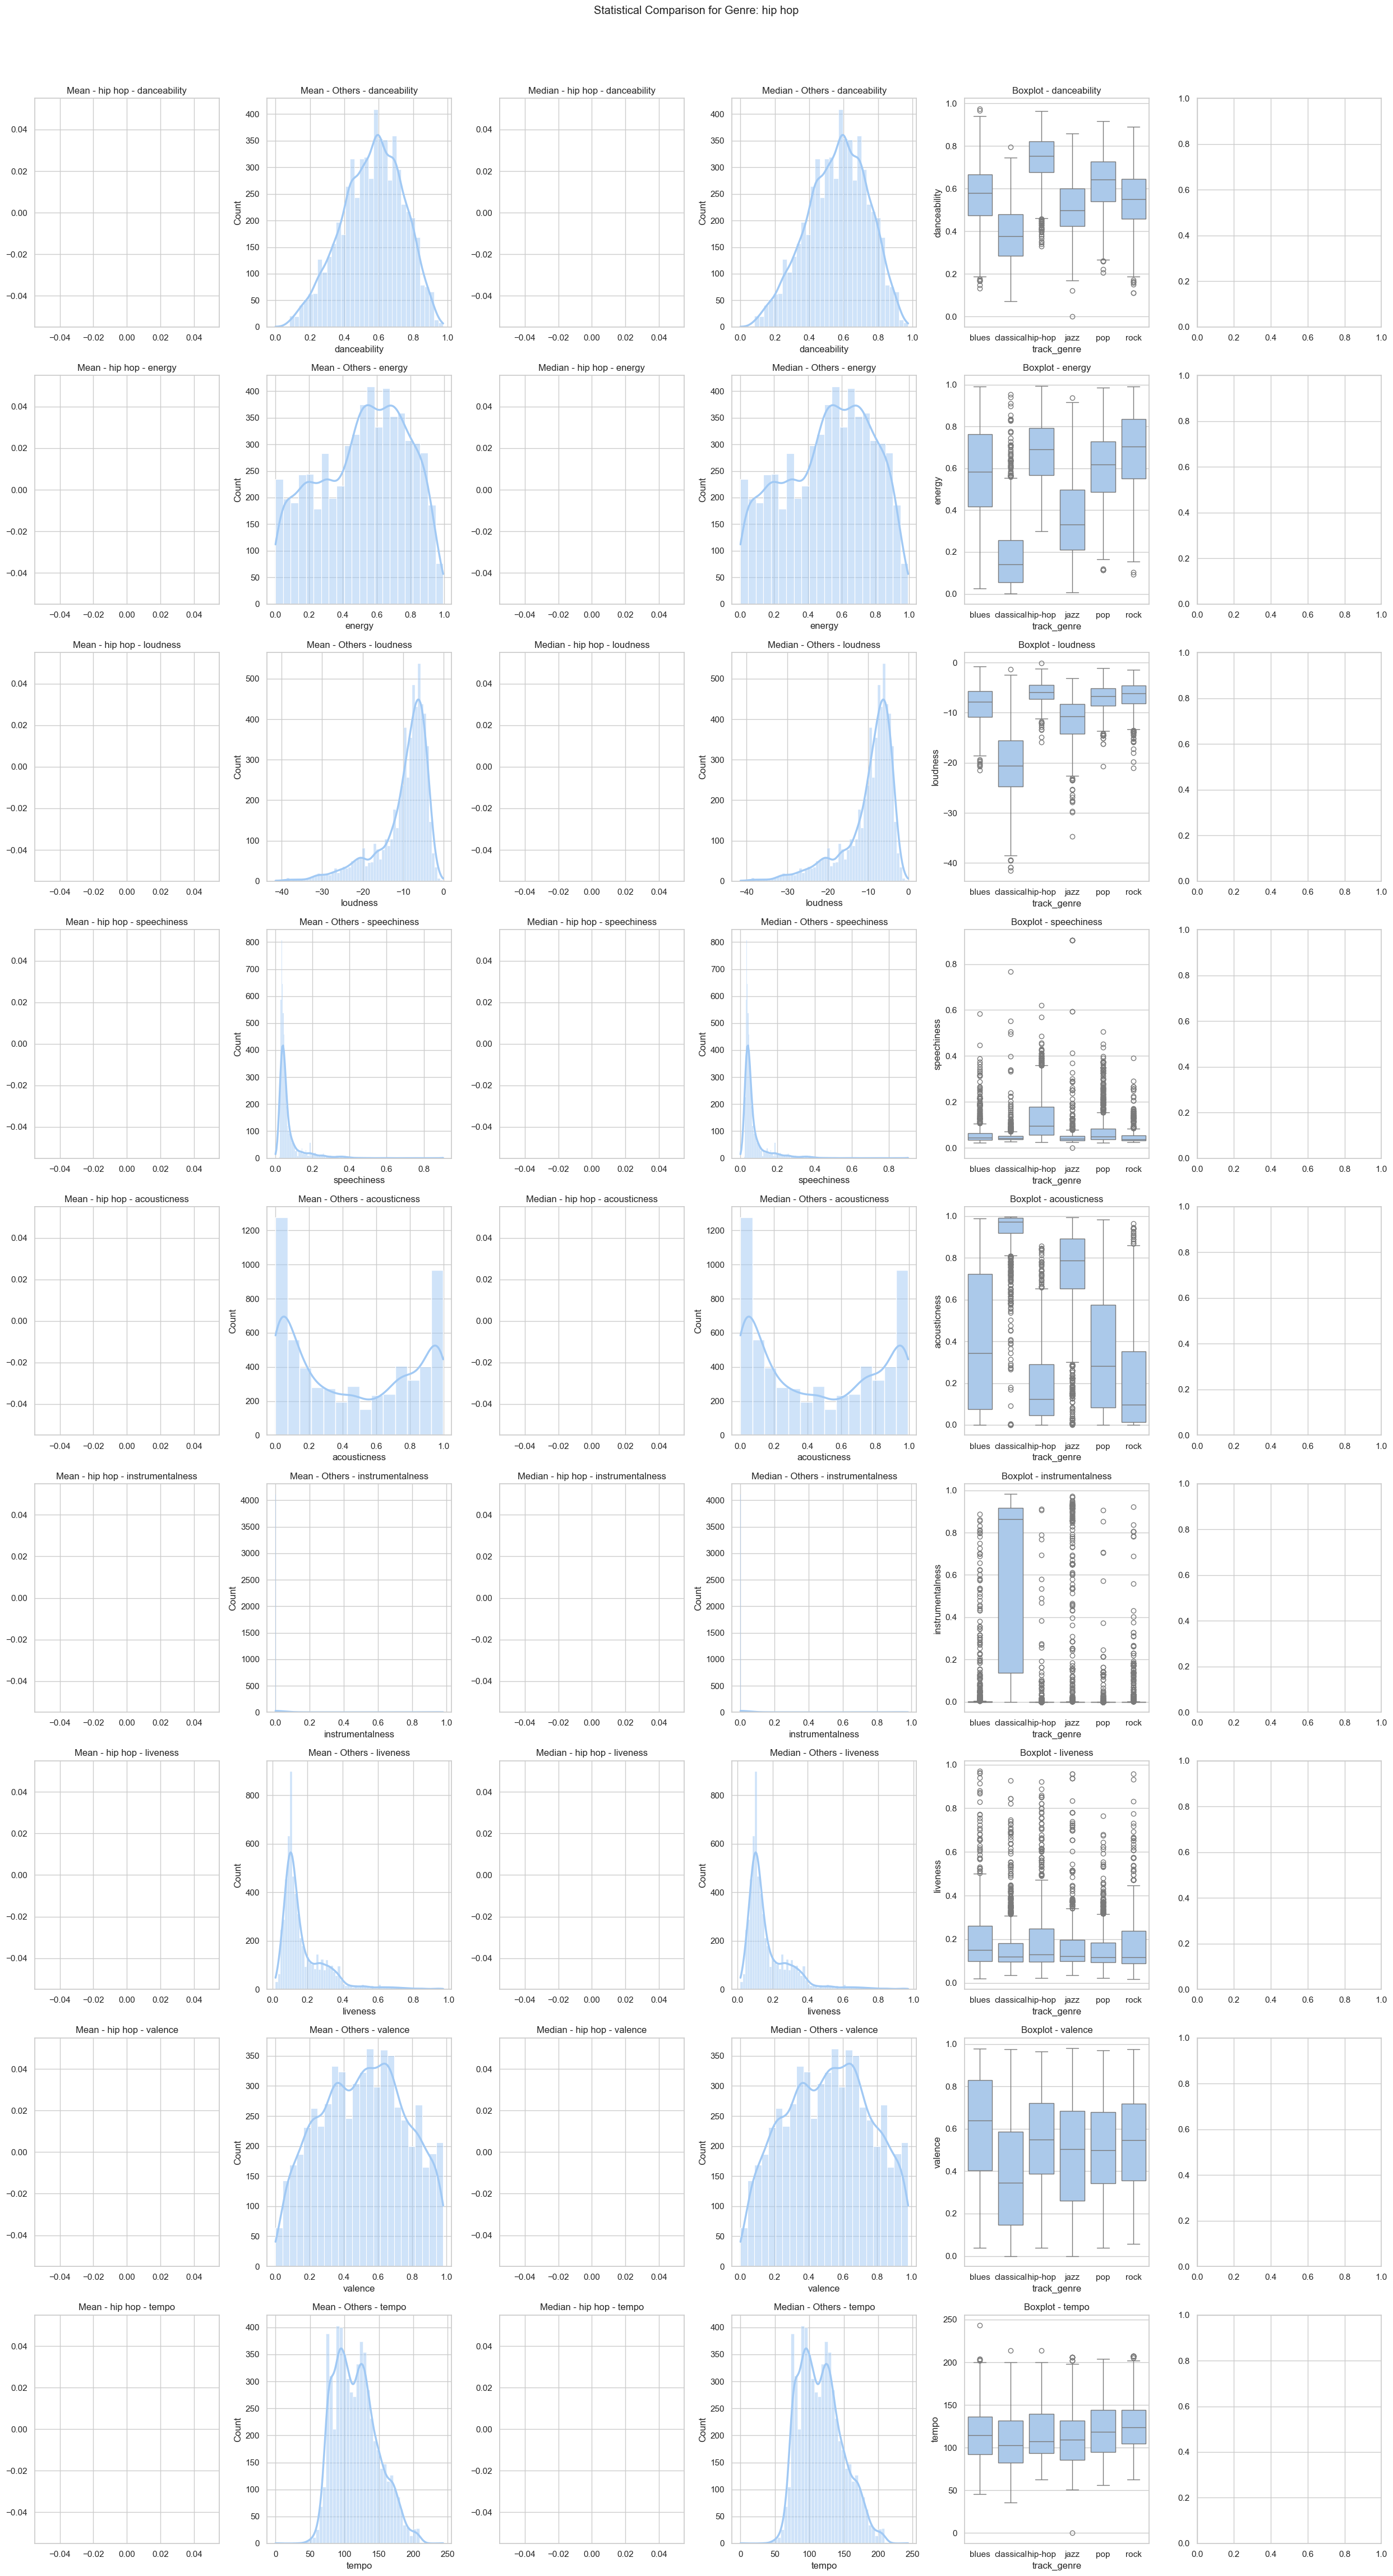

In [31]:
def compare(gen_df, selected_genre):
    
    # Excluding 'track_genre' from the comparison
    features_to_compare = gen_df.columns[0:-1]  

    # Extracting the list of other genres except the selected genre
    other_genres = gen_df['track_genre'].unique()
    other_genres = other_genres[other_genres != selected_genre]

    # Creating a figure with subplots
    fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=6, figsize=(25, 5 * len(features_to_compare)))
    fig.suptitle(f'Statistical Comparison for Genre: {selected_genre}', y=1.02)

    # Looping through each feature
    # Using enumerate function as it helps in exploring through all features one by one in 2D aspect
    for i, feature in enumerate(features_to_compare):
        
        # Calculating mean and median for the selected genre using mean() dunction
        mean_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].mean()
        median_selected_genre = gen_df[gen_df['track_genre'] == selected_genre][feature].median()

        # Calculating mean and median for all other genres using median() function
        mean_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].mean()
        median_other_genres = gen_df[gen_df['track_genre'].isin(other_genres)][feature].median()

        # Printing mean and median values
        print(f"Mean_{selected_genre}_{feature}: {mean_selected_genre}\tMean_Others_{feature}: {mean_other_genres}")
        print(f"Median_{selected_genre}_{feature}: {median_selected_genre}\tMedian_Others_{feature}: {median_other_genres}\n")

        # Mean Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Mean - {selected_genre} - {feature}')

        # Mean Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Mean - Others - {feature}')

        # Median Plot for the selected genre
        sns.histplot(gen_df[gen_df['track_genre'] == selected_genre][feature], kde=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Median - {selected_genre} - {feature}')

        # Media Plot for all other genres
        sns.histplot(gen_df[gen_df['track_genre'].isin(other_genres)][feature], kde=True, ax=axes[i, 3])
        axes[i, 3].set_title(f'Median - Others - {feature}')

        # Boxplot for all genres
        sns.boxplot(x='track_genre', y=feature, data=gen_df, ax=axes[i, 4])
        axes[i, 4].set_title(f'Boxplot - {feature}')
        

    # printing the plot outputs    
    plt.tight_layout()
    plt.show()

compare(gen_df, 'hip hop')


In [27]:
print(gen_df[gen_df['track_genre'] == 'hip hop'].isnull().sum())

danceability        0.0
energy              0.0
loudness            0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
track_genre         0.0
dtype: float64


In [31]:
gen_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')

In [33]:
hip_hop_data = gen_df[gen_df['track_genre'] == 'hip hop'][['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']]

# Filter out zero values or other invalid values
hip_hop_data = hip_hop_data[hip_hop_data['danceability'] != 0.0]

# Now, calculate mean and median
mean_danceability = hip_hop_data['danceability'].mean()
median_danceability = hip_hop_data['danceability'].median()